Sample Data:
   SquareFootage  Bedrooms  Bathrooms   Price
0           3674         4          2  602267
1           1360         4          3  296192
2           1794         3          3  325162
3           1630         2          2  293040
4           1595         4          3  328494

Model Coefficients:
Intercept: 6302.88
Coefficients: {'SquareFootage': np.float64(148.42286514468825), 'Bedrooms': np.float64(10071.28457297336), 'Bathrooms': np.float64(14349.829058893807)}

Model Performance:
Mean Squared Error: 130604712.18
R2 Score: 0.9949


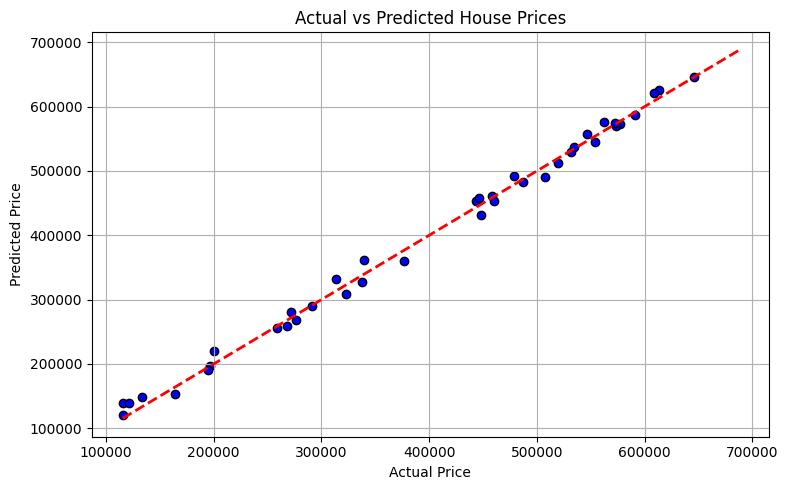

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(42)
n_samples = 200

sqft = np.random.randint(500, 4000, n_samples)
bedrooms = np.random.randint(1, 6, n_samples)
bathrooms = np.random.randint(1, 4, n_samples)

price = sqft * 150 + bedrooms * 10000 + bathrooms * 15000 + np.random.randint(-20000, 20000, n_samples)

df = pd.DataFrame({
    'SquareFootage': sqft,
    'Bedrooms': bedrooms,
    'Bathrooms': bathrooms,
    'Price': price
})

print("Sample Data:")
print(df.head())

X = df[['SquareFootage', 'Bedrooms', 'Bathrooms' ]]
y = df['Price' ]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("\nModel Coefficients:")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficients: {dict(zip(X.columns,model.coef_))}")

print("\nModel Performance:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred) :.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred) :.4f}")

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k')
plt.plot([y.min(),y.max()], [y.min(), y.max()], 'r--', linewidth=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.tight_layout()
plt.show()